The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
run_window: X_all shape (275, 127, 38), y_all shape (275, 127)
run_window: window_size=50, n_series=127, n_features=38
run_window: number of test windows=6


Parallel preds: 100%|██████████| 6/6 [01:17<00:00, 12.92s/it]


MILR components: 60
  P comp 0: [(127, 5), (38, 5)]
  P comp 1: [(127, 5), (38, 5)]
  P comp 2: [(127, 5), (38, 5)]
  P comp 3: [(127, 5), (38, 5)]
  P comp 4: [(127, 5), (38, 5)]
  P comp 5: [(127, 5), (38, 5)]
  P comp 6: [(127, 5), (38, 5)]
  P comp 7: [(127, 5), (38, 5)]
  P comp 8: [(127, 5), (38, 5)]
  P comp 9: [(127, 5), (38, 5)]
  P comp 10: [(127, 5), (38, 5)]
  P comp 11: [(127, 5), (38, 5)]
  P comp 12: [(127, 5), (38, 5)]
  P comp 13: [(127, 5), (38, 5)]
  P comp 14: [(127, 5), (38, 5)]
  P comp 15: [(127, 5), (38, 5)]
  P comp 16: [(127, 5), (38, 5)]
  P comp 17: [(127, 5), (38, 5)]
  P comp 18: [(127, 5), (38, 5)]
  P comp 19: [(127, 5), (38, 5)]
  P comp 20: [(127, 5), (38, 5)]
  P comp 21: [(127, 5), (38, 5)]
  P comp 22: [(127, 5), (38, 5)]
  P comp 23: [(127, 5), (38, 5)]
  P comp 24: [(127, 5), (38, 5)]
  P comp 25: [(127, 5), (38, 5)]
  P comp 26: [(127, 5), (38, 5)]
  P comp 27: [(127, 5), (38, 5)]
  P comp 28: [(127, 5), (38, 5)]
  P comp 29: [(127, 5), (38, 5)]


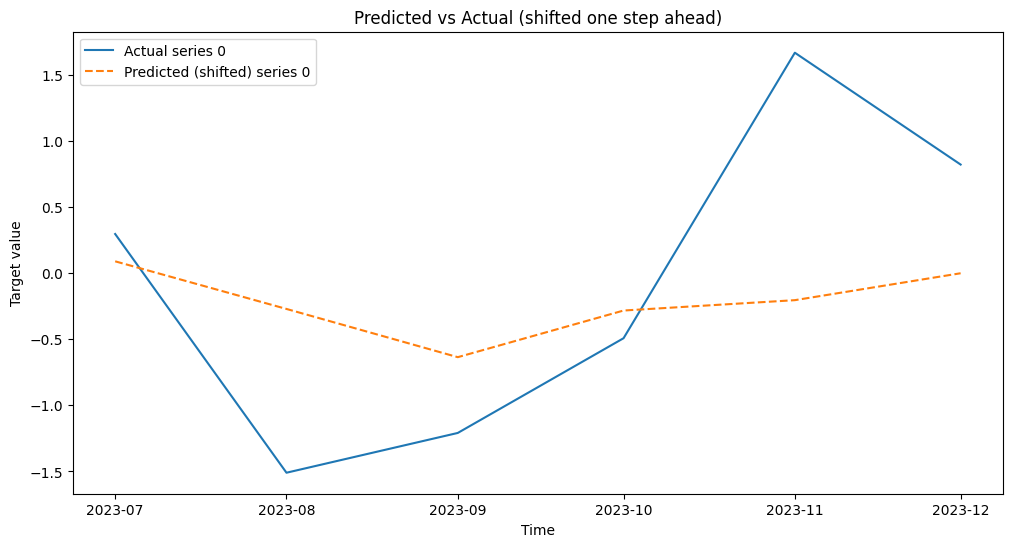

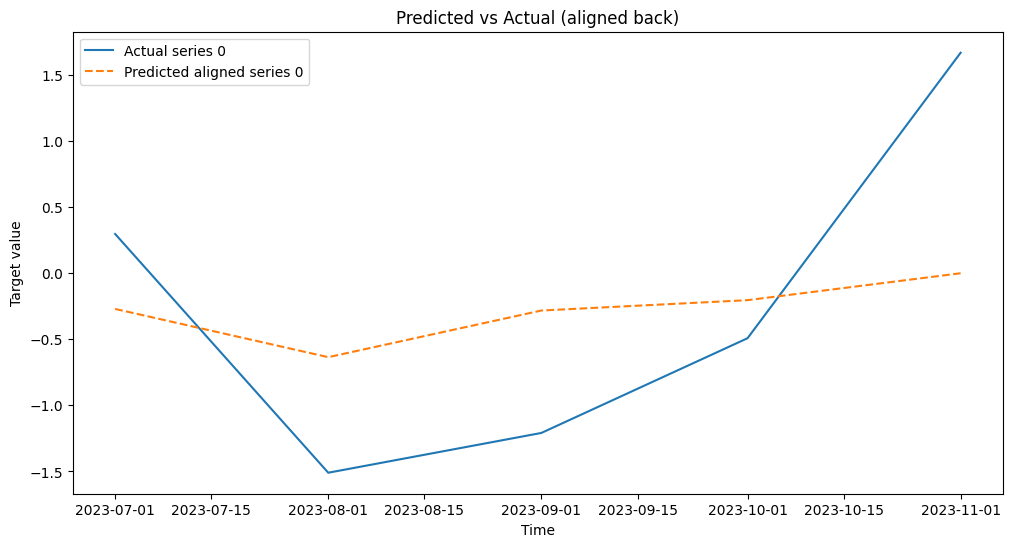

In [ ]:
# import pandas as pd
# import numpy as np
# from tqdm import tqdm

# from model.prediction_engine import get_final_data
# # final_data = get_final_data(save_to_csv=False)
# final_data = pd.read_csv('data/final_data.csv')

# import torch
# import tensorly as tl
# %load_ext autoreload
# %autoreload 2

# from model.prediction_engine import PredictionTestEngine

# final_data = final_data.sort_values(['year_month', 'GVKEY'])
# final_data['trt1m'] = pd.to_numeric(final_data['trt1m'], errors='coerce')

# # feature columns
# feature_cols = [c for c in final_data.columns 
#                 if c not in ['GVKEY','year_month','trt1m']]
# for col in feature_cols:
#     final_data[col] = pd.to_numeric(final_data[col], errors='coerce')

# # Build Y (T × n_series)
# Y_df = (final_data
#     .pivot_table(index='year_month', columns='GVKEY', 
#                  values='trt1m', aggfunc='mean')
#     .sort_index().sort_index(axis=1)
# )
# Y_df = Y_df.apply(lambda x: (x - x.mean())/x.std(), axis=0)
# Y = Y_df.to_numpy()

# # Build X tensor (T × n_series × n_features)
# X_list = []
# for col in feature_cols:
#     pivot = (final_data
#         .pivot_table(index='year_month', columns='GVKEY', 
#                      values=col, aggfunc='mean')
#         .reindex(index=Y_df.index, columns=Y_df.columns)
#     )
#     pivot = pivot.apply(lambda x: (x - x.mean())/x.std(), axis=0)
#     X_list.append(pivot.to_numpy())
# X = np.stack(X_list, axis=2)

# # Shift so that X[t] predicts Y[t+1]
# X_all = np.nan_to_num(X[:-1, :, :])
# Y_all = np.nan_to_num(Y[1:, :])

# # Time index for the test (use first day of month)
# time_index_all = pd.to_datetime(Y_df.index[1:], format='%Y-%m')

# # Ensure tensorly backend
# tl.set_backend("pytorch")
# torch.set_default_tensor_type(torch.DoubleTensor)
# torch.set_default_dtype(torch.float64)





# # Instantiate engine
# window_size = 50
# train_start = int(0.98 * X_all.shape[0])
# engine = PredictionTestEngine(
#     X_all,
#     Y_all,
#     window_size=window_size,
#     time_index=time_index_all,
#     train_start=train_start,
# )

# y_pred, y_true, times, metrics = engine.run_window(
#     method="hopls_milr"
#     , R=60, Ln=(5, 5), epsilon=1e-6, verbose=True, n_jobs=7, lambda_X = 0.1, lambda_Y = 0.1, alpha=1.0,
# )

# print("Overall metrics:")
# for k, v in metrics.items():
#     print(f"{k}: {v:.4f}")

# # Plot results for series 0
# engine.plot_results(series_indices=[0])

# Import Data

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from model.prediction_engine import get_final_data
# final_data = get_final_data(save_to_csv=False)
final_data = pd.read_csv('data/final_data.csv')

## Process Data

In [5]:
import torch
import tensorly as tl
%load_ext autoreload
%autoreload 2

from model.prediction_engine import PredictionTestEngine

final_data = final_data.sort_values(['year_month', 'GVKEY'])
final_data['trt1m'] = pd.to_numeric(final_data['trt1m'], errors='coerce')

# feature columns
feature_cols = [c for c in final_data.columns 
                if c not in ['GVKEY','year_month','trt1m']]
for col in feature_cols:
    final_data[col] = pd.to_numeric(final_data[col], errors='coerce')

# Build Y (T × n_series)
Y_df = (final_data
    .pivot_table(index='year_month', columns='GVKEY', 
                 values='trt1m', aggfunc='mean')
    .sort_index().sort_index(axis=1)
)
Y_df = Y_df.apply(lambda x: (x - x.mean())/x.std(), axis=0)
Y = Y_df.to_numpy()

# Build X tensor (T × n_series × n_features)
X_list = []
for col in feature_cols:
    pivot = (final_data
        .pivot_table(index='year_month', columns='GVKEY', 
                     values=col, aggfunc='mean')
        .reindex(index=Y_df.index, columns=Y_df.columns)
    )
    pivot = pivot.apply(lambda x: (x - x.mean())/x.std(), axis=0)
    X_list.append(pivot.to_numpy())
X = np.stack(X_list, axis=2)

# Shift so that X[t] predicts Y[t+1]
X_all = np.nan_to_num(X[:-1, :, :])
Y_all = np.nan_to_num(Y[1:, :])

# Time index for the test (use first day of month)
time_index_all = pd.to_datetime(Y_df.index[1:], format='%Y-%m')

# Ensure tensorly backend
tl.set_backend("pytorch")
torch.set_default_tensor_type(torch.DoubleTensor)
torch.set_default_dtype(torch.float64)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Linear Regression

Overall metrics:
mse: 1.2075
r2: -0.0059
directional_accuracy: 0.5405


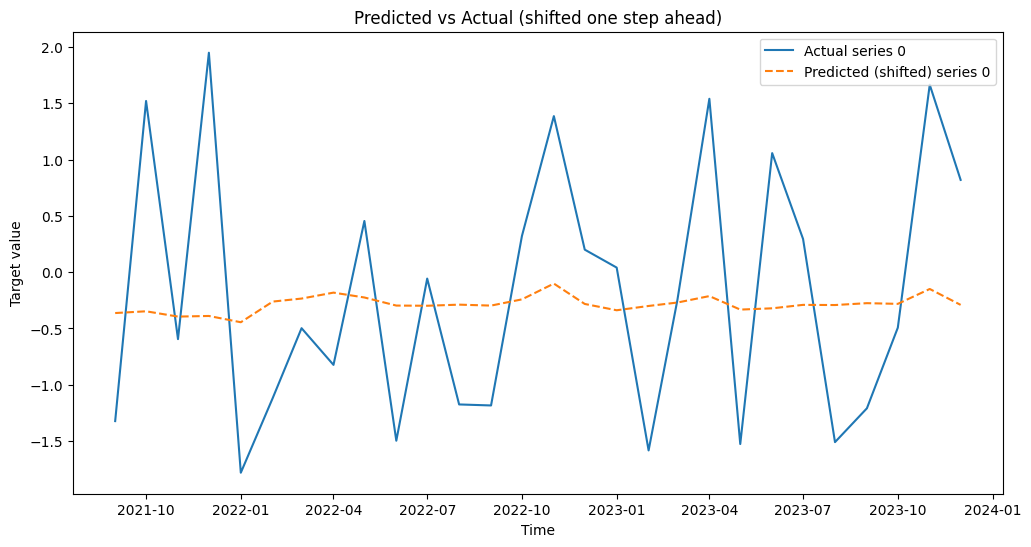

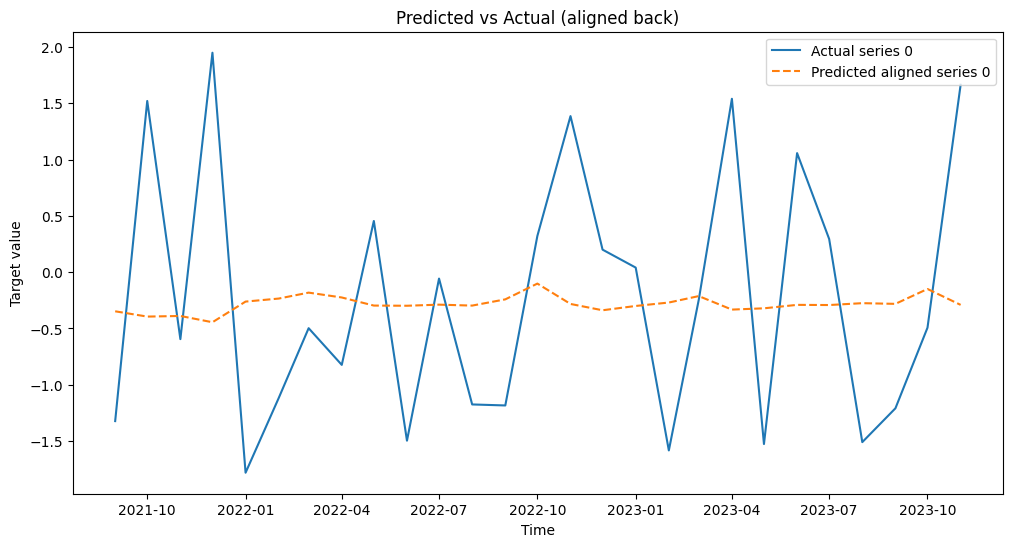

In [11]:
# Instantiate engine
window_size = 50
train_start = int(0.90 * X_all.shape[0])
engine = PredictionTestEngine(
    X_all,
    Y_all,
    window_size=window_size,
    train_start=train_start,
    time_index=time_index_all,
)

y_pred, y_true, times, metrics = engine.run_window(
    method="linear_regression"
)

print("Overall metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# Plot results for series 0
engine.plot_results(series_indices=[0])

### Ridge Regression

Overall metrics:
mse: 1.2075
r2: -0.0059
directional_accuracy: 0.5408


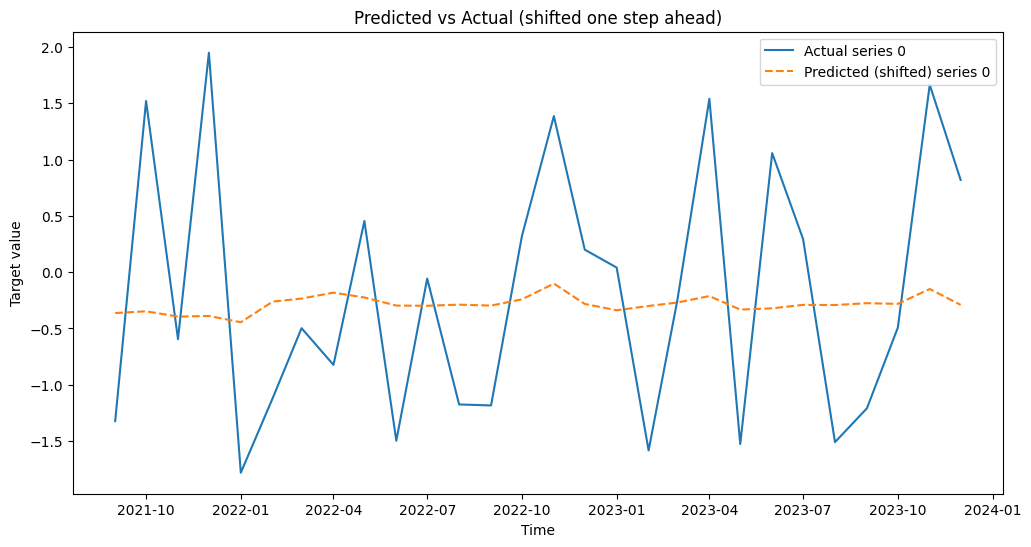

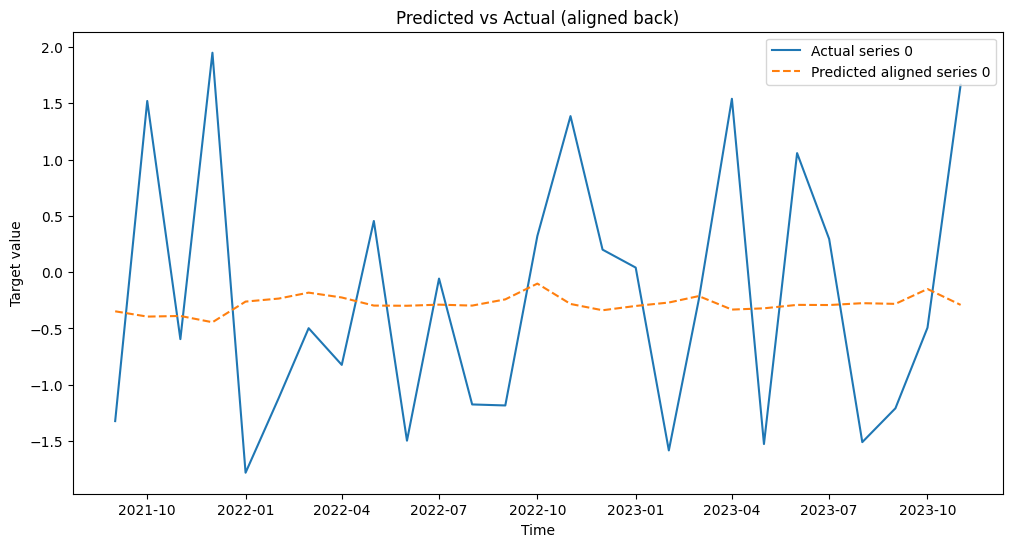

In [12]:
# Instantiate engine
window_size = 50
train_start = int(0.90 * X_all.shape[0])
engine = PredictionTestEngine(
    X_all,
    Y_all,
    window_size=window_size,
    train_start=train_start,
    time_index=time_index_all,
)

y_pred, y_true, times, metrics = engine.run_window(
    method="ridge"
)

print("Overall metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# Plot results for series 0
engine.plot_results(series_indices=[0])

### HOPLS

run_window: X_all shape (275, 127, 38), y_all shape (275, 127)
run_window: window_size=50, n_series=127, n_features=38
run_window: number of test windows=55


Parallel preds: 100%|██████████| 55/55 [03:12<00:00,  3.50s/it]


Components: 30
P shapes per component:
  Comp 0: [(127, 1), (38, 1)]
  Comp 1: [(127, 1), (38, 1)]
  Comp 2: [(127, 1), (38, 1)]
  Comp 3: [(127, 1), (38, 1)]
  Comp 4: [(127, 1), (38, 1)]
  Comp 5: [(127, 1), (38, 1)]
  Comp 6: [(127, 1), (38, 1)]
  Comp 7: [(127, 1), (38, 1)]
  Comp 8: [(127, 1), (38, 1)]
  Comp 9: [(127, 1), (38, 1)]
  Comp 10: [(127, 1), (38, 1)]
  Comp 11: [(127, 1), (38, 1)]
  Comp 12: [(127, 1), (38, 1)]
  Comp 13: [(127, 1), (38, 1)]
  Comp 14: [(127, 1), (38, 1)]
  Comp 15: [(127, 1), (38, 1)]
  Comp 16: [(127, 1), (38, 1)]
  Comp 17: [(127, 1), (38, 1)]
  Comp 18: [(127, 1), (38, 1)]
  Comp 19: [(127, 1), (38, 1)]
  Comp 20: [(127, 1), (38, 1)]
  Comp 21: [(127, 1), (38, 1)]
  Comp 22: [(127, 1), (38, 1)]
  Comp 23: [(127, 1), (38, 1)]
  Comp 24: [(127, 1), (38, 1)]
  Comp 25: [(127, 1), (38, 1)]
  Comp 26: [(127, 1), (38, 1)]
  Comp 27: [(127, 1), (38, 1)]
  Comp 28: [(127, 1), (38, 1)]
  Comp 29: [(127, 1), (38, 1)]
Q_mat shape: (127, 30), D shape: (30, 30)

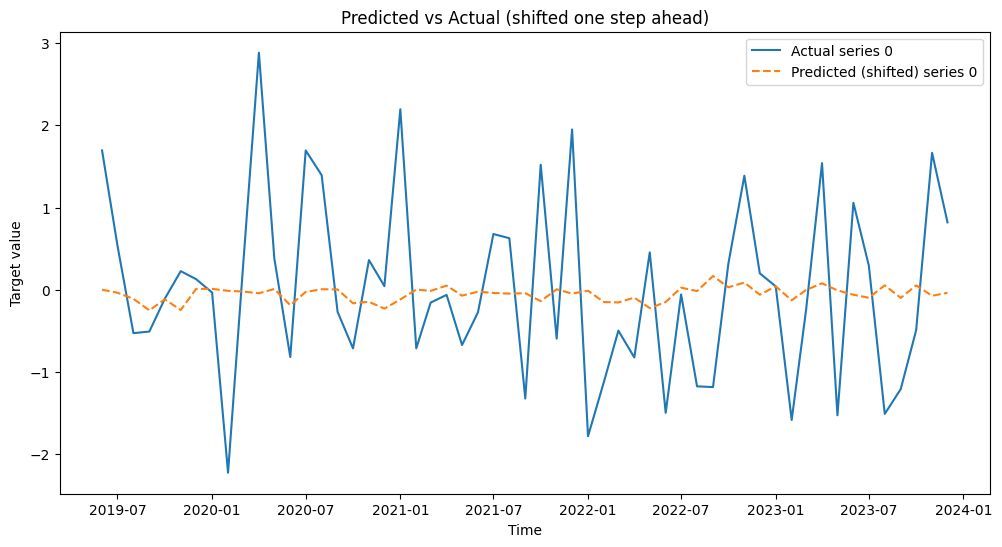

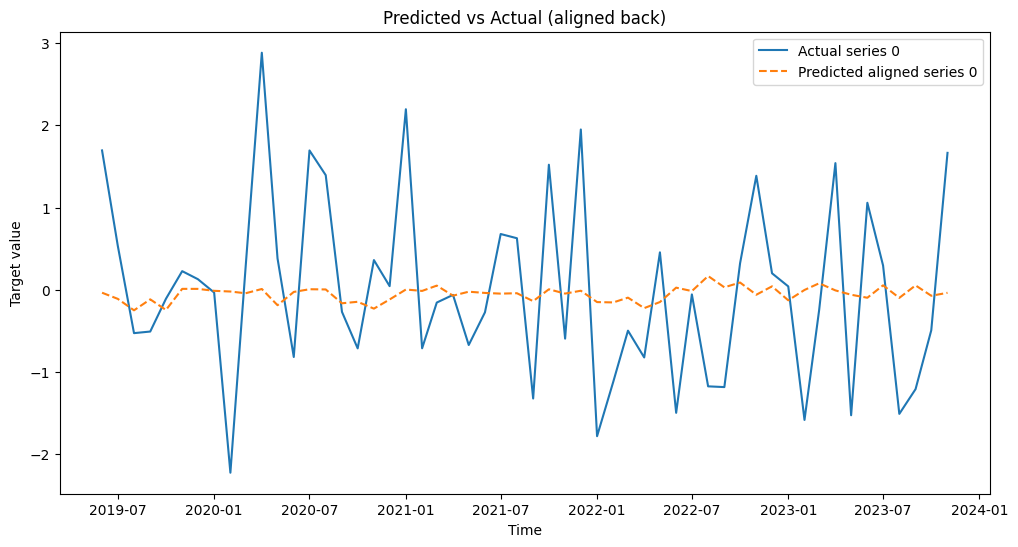

In [ ]:
# Instantiate engine
window_size = 50
train_start = int(0.8 * X_all.shape[0])
engine = PredictionTestEngine(
    X_all,
    Y_all,
    window_size=window_size,
    train_start=train_start,
    time_index=time_index_all,
)

y_pred, y_true, times, metrics = engine.run_window(
    method="hopls"
    , R=30, Ln=(3, 3), epsilon=1e-8, verbose=True, n_jobs=7
)

print("Overall metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# Plot results for series 0
engine.plot_results(series_indices=[0])

### HOPLS-MILR

Parallel preds: 100%|██████████| 28/28 [02:02<00:00,  4.39s/it]


Overall metrics:
mse: 1.1954
r2: 0.0041
directional_accuracy: 0.5585


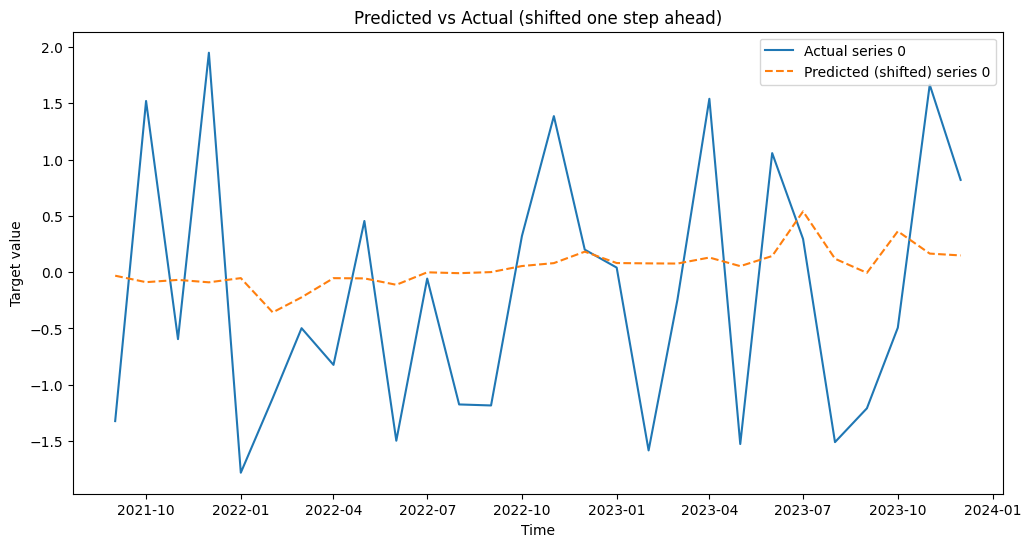

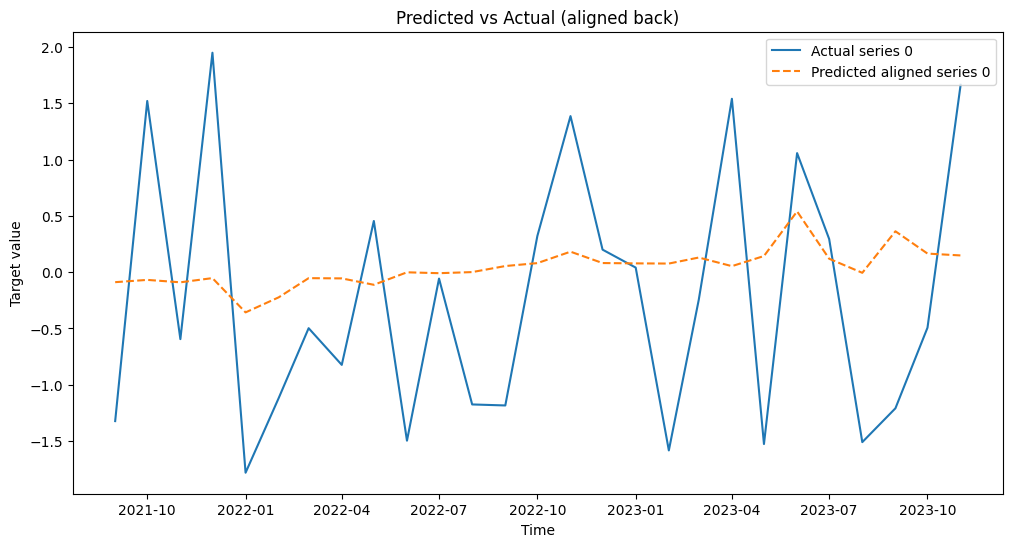

In [9]:
# Instantiate engine
window_size = 50
train_start = int(0.90 * X_all.shape[0])
engine = PredictionTestEngine(
    X_all,
    Y_all,
    window_size=window_size,
    train_start=train_start,
    time_index=time_index_all,
)

y_pred, y_true, times, metrics = engine.run_window(
    method="hopls_milr"
    , R=40, Ln=(1, 1), epsilon=1e-6, verbose=True, n_jobs=7, lambda_X = 1e-5, lambda_Y = 1e-5, alpha=1.1,
)

print("Overall metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# Plot results for series 0
engine.plot_results(series_indices=[0])

run_window: X_all shape (275, 127, 38), y_all shape (275, 127)
run_window: window_size=50, n_series=127, n_features=38
run_window: number of test windows=17


Parallel preds: 100%|██████████| 17/17 [03:46<00:00, 13.31s/it]


MILR components: 60
  P comp 0: [(127, 7), (38, 7)]
  P comp 1: [(127, 7), (38, 7)]
  P comp 2: [(127, 7), (38, 7)]
  P comp 3: [(127, 7), (38, 7)]
  P comp 4: [(127, 7), (38, 7)]
  P comp 5: [(127, 7), (38, 7)]
  P comp 6: [(127, 7), (38, 7)]
  P comp 7: [(127, 7), (38, 7)]
  P comp 8: [(127, 7), (38, 7)]
  P comp 9: [(127, 7), (38, 7)]
  P comp 10: [(127, 7), (38, 7)]
  P comp 11: [(127, 7), (38, 7)]
  P comp 12: [(127, 7), (38, 7)]
  P comp 13: [(127, 7), (38, 7)]
  P comp 14: [(127, 7), (38, 7)]
  P comp 15: [(127, 7), (38, 7)]
  P comp 16: [(127, 7), (38, 7)]
  P comp 17: [(127, 7), (38, 7)]
  P comp 18: [(127, 7), (38, 7)]
  P comp 19: [(127, 7), (38, 7)]
  P comp 20: [(127, 7), (38, 7)]
  P comp 21: [(127, 7), (38, 7)]
  P comp 22: [(127, 7), (38, 7)]
  P comp 23: [(127, 7), (38, 7)]
  P comp 24: [(127, 7), (38, 7)]
  P comp 25: [(127, 7), (38, 7)]
  P comp 26: [(127, 7), (38, 7)]
  P comp 27: [(127, 7), (38, 7)]
  P comp 28: [(127, 7), (38, 7)]
  P comp 29: [(127, 7), (38, 7)]


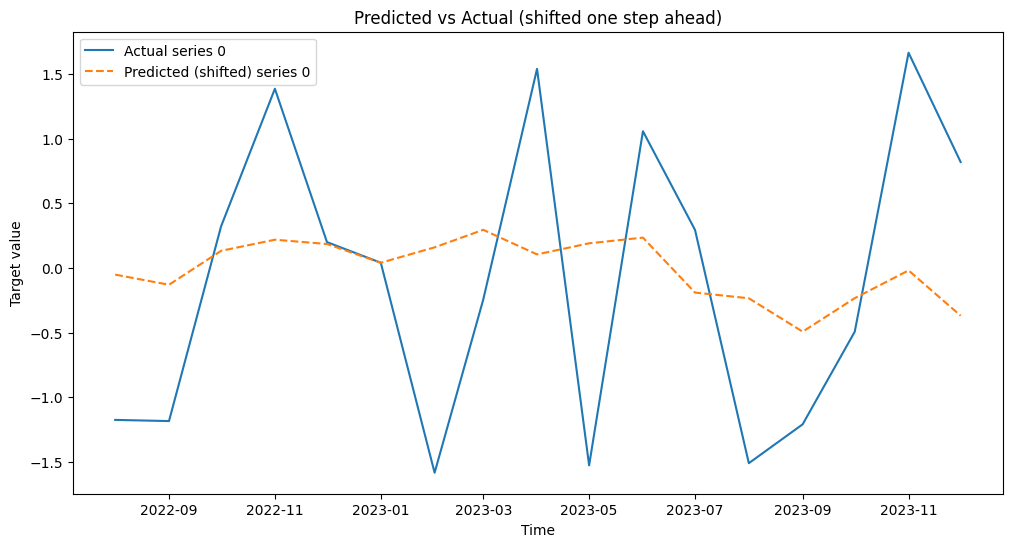

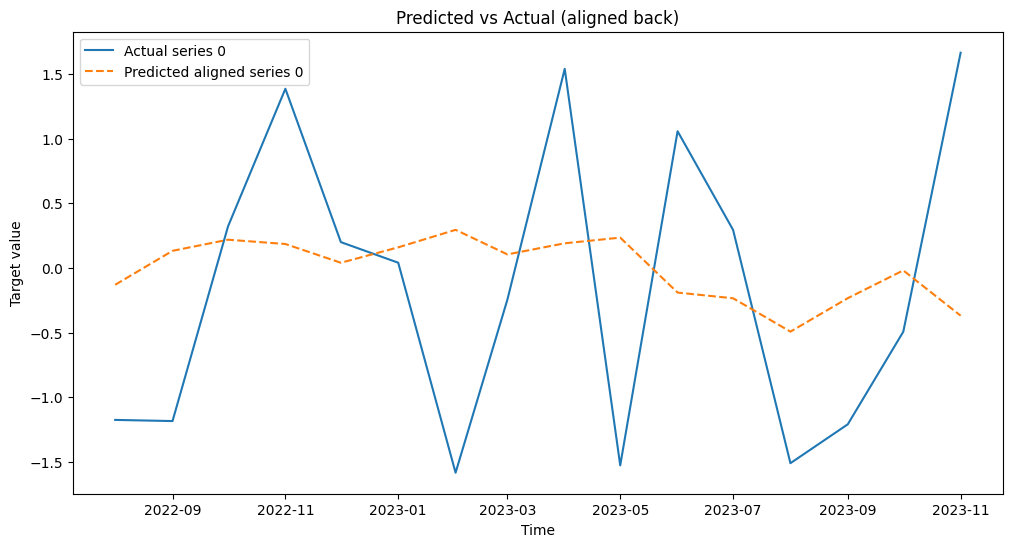

In [ ]:
# Instantiate engine
window_size = 50
train_start = int(0.64 * X_all.shape[0])
engine = PredictionTestEngine(
    X_all,
    Y_all,
    window_size=window_size,
    time_index=time_index_all,
    train_start=train_start,
)

y_pred, y_true, times, metrics = engine.run_window(
    method="hopls_milr"
    , R=60, Ln=(7, 7), epsilon=1e-5, verbose=True, n_jobs=7, lambda_X = 1e-2, lambda_Y = 1e-7, alpha=4.0
)

print("Overall metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# Plot results for series 0
engine.plot_results(series_indices=[0])